# Prediction of Test Dataset

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pickle

from models import DLinkNet34, LinkNet34, FarSegNet
import data_loader
import loss
import tester

In [2]:
# root_path = 'D://Data/massachusetts-roads-dataset/'
root_path = '/home/renyan/ossdata/massachusetts-roads-dataset/'
road_path = root_path + "tiff_select3_parts_16/"
DIR_CHECKPOINT = 'checkpoints/'
TEST_SAVE_PATH = '/home/renyan/road-extraction/predict_result/'

In [3]:
INPUT_SIZE, OUTPUT_SIZE = 256, 256
test_dataset = data_loader.RoadDataset(road_path, INPUT_SIZE, OUTPUT_SIZE, data_class = 'test')

test dataset set: 784 pairs


In [43]:
def tt_info(tt):
    nan0 = list(set(np.where(np.isnan(tt.dice_score))[0].tolist()).union(set(np.where(tt.dice_score == np.float32(0))[0].tolist())))
    print("{} pairs both whole black, {} pairs with one whole black".format(len(np.where(np.isnan(tt.dice_score))[0].tolist()),
                                                                           len(np.where(np.isnan(tt.dice_score))[0].tolist())))
    dice_score = [t for i, t in enumerate(tt.dice_score) if i not in nan0]
    iou_score = [t for i, t in enumerate(tt.iou_score) if i not in nan0]
    print("Finally: mean dice {}, mean iou {}".format(np.mean(dice_score), np.mean(iou_score)))

## LinkNet

In [5]:
# with open('pickle_objects/tt_linknet.pickle', 'rb') as f:  
#     tt_linknet = pickle.load(f)

In [6]:
net = LinkNet34.LinkNet34()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tt_linknet = tester.Tester(net = net, 
                   device = device, 
                   dir_stat = 'v2_linknet34_re_epoch20.pth', 
                   test_dataset = test_dataset,
                   threshold = 0.501,
                   save_path = TEST_SAVE_PATH, 
                   dir_checkpoint = DIR_CHECKPOINT)

Tester with net para in v2_linknet34_re_epoch20.pth is ready 
(threshold = 0.501, 784 pairs in test dataset)


In [7]:
tt_linknet.test_score()

100%|██████████| 784/784 [01:41<00:00,  7.73it/s]

current threshold: 0.501
mean dice: 0.6729385569654135
mean iou: 0.6038084259394872


In [45]:
tt_info(tt_linknet)

0 pairs both whole black, 0 pairs with one whole black
Finally: mean dice 0.6729385569654135, mean iou 0.6038084259394872


In [27]:
# tt = tt_linknet
# print(np.where(tt.dice_score <= np.quantile(tt.dice_score, 0.05)), '\n',
#      np.where(tt.iou_score <= np.quantile(tt.iou_score, 0.05)))
# print(np.where(tt.dice_score >= np.quantile(tt.dice_score, 0.95)), '\n',
#      np.where(tt.iou_score >= np.quantile(tt.iou_score, 0.95)))

In [28]:
# tt_linknet.test_idx(706)

In [33]:
tt_linknet.save(subfolder = "test_result/linknet34_re_epoch20/")

100%|██████████| 784/784 [00:01<00:00, 538.13it/s]


In [36]:
# with open('pickle_objects/tt_linknet.pickle','wb') as p:
#     pickle.dump(tt_linknet, p)

## D-LinkNet

In [ ]:
# with open('pickle_objects/tt_dlinknet.pickle', 'rb') as f:  
#     tt_dlinknet = pickle.load(f)

In [31]:
net = DLinkNet34.DLinkNet34()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tt_dlinknet = tester.Tester(net = net, 
                   device = device, 
                   dir_stat = 'v2_dlinknet34_re_epoch20.pth', 
                   test_dataset = test_dataset,
                   threshold = 0.503,
                   save_path = TEST_SAVE_PATH, 
                   dir_checkpoint = DIR_CHECKPOINT)

Tester with net para in v2_dlinknet34_re_epoch20.pth is ready 
(threshold = 0.503, 784 pairs in test dataset)


In [32]:
tt_dlinknet.test_score()

100%|██████████| 784/784 [01:58<00:00,  6.60it/s]

current threshold: 0.503
mean dice: 0.6566187642462598
mean iou: 0.5900316609266777


In [44]:
tt_info(tt_dlinknet)

0 pairs both whole black, 0 pairs with one whole black
Finally: mean dice 0.6566187642462598, mean iou 0.5900316609266777


In [37]:
tt_dlinknet.save(subfolder = "test_result/dlinknet34_re_epoch20/")

100%|██████████| 784/784 [00:01<00:00, 502.08it/s]


In [ ]:
# with open('pickle_objects/tt_dlinknet.pickle','wb') as p:
#     pickle.dump(tt_dlinknet, p)

## FarSeg Net

In [ ]:
# with open('pickle_objects/tt_farseg.pickle', 'rb') as f:  
#     tt_farseg = pickle.load(f)

In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = FarSegNet.FarSegNet().to(device)
tt_farseg = tester.Tester(net = net, 
                   device = device, 
                   dir_stat = 're_farseg_epoch33_global_step58212.pth', 
                   test_dataset = test_dataset,
                   threshold = 0.5,
                   save_path = TEST_SAVE_PATH, 
                   dir_checkpoint = DIR_CHECKPOINT)

Tester with net para in re_farseg_epoch33_global_step58212.pth is ready 
(threshold = 0.5, 784 pairs in test dataset)


In [41]:
tt_farseg.test_score()

100%|██████████| 784/784 [01:55<00:00,  6.81it/s]

current threshold: 0.5
mean dice: 0.6519711011577956
mean iou: 0.5659925790611711


In [46]:
tt_info(tt_farseg)

0 pairs both whole black, 0 pairs with one whole black
Finally: mean dice 0.6519711011577956, mean iou 0.5659925790611711


In [47]:
tt_farseg.save(subfolder = "test_result/farseg_re_epoch33/")

  6%|▌         | 47/784 [00:00<00:01, 463.21it/s]

Build folder of /home/renyan/road-extraction/predict_result/test_result/farseg_re_epoch33/


100%|██████████| 784/784 [00:01<00:00, 556.76it/s]


In [49]:
# with open('pickle_objects/tt_farseg.pickle','wb') as p:
#     pickle.dump(tt_farseg, p)

## Save Results

In [20]:
# for t in np.arange(0.497, 0.503, 0.001):
#     tt.set_threshold(t)
#     tt.test_score()
#     tt.write_info("D-Linknet34")

In [7]:
tt.pred.max()

tensor(1., device='cuda:0')

In [ ]:
tt.set_threshold(0.9)
tt.test_score()
tt.write_info("D-Linknet34")

In [23]:
tt.save(subfolder = "test_result/dlinknet34_re_epoch20/")

  8%|▊         | 61/784 [00:00<00:01, 601.71it/s]

Build folder of /home/renyan/road-extraction/predict_result/test_result/dlinknet34_re_epoch20/


100%|██████████| 784/784 [00:01<00:00, 596.18it/s]


## Good & Bad Prediction Examples

In [8]:
len(tt.pred_list)

784

In [9]:
print(np.where(tt.dice_score >= np.quantile(tt.dice_score, 0.95)), '\n',
     np.where(tt.iou_score >= np.quantile(tt.iou_score, 0.95)))

(array([  3,  36,  37,  44,  52,  64,  78,  79,  80,  99, 125, 142, 152,
       205, 207, 223, 226, 241, 248, 250, 252, 264, 268, 283, 297, 300,
       301, 326, 327, 331, 332, 335, 341, 510, 514, 540, 564, 573, 669,
       769]),) 
 (array([  3,  36,  37,  44,  52,  64,  78,  79,  80,  99, 125, 142, 152,
       205, 207, 223, 226, 241, 248, 250, 252, 264, 268, 283, 297, 300,
       301, 326, 327, 331, 332, 335, 341, 510, 514, 540, 564, 573, 669,
       769]),)


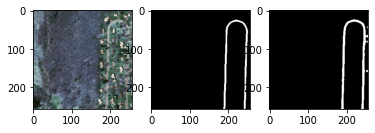

In [11]:
# good prediction
tt.test_idx(78, combine = False)

In [12]:
print(np.where(tt.dice_score == np.min(tt.dice_score)), '\n', np.where(tt.iou_score == np.min(tt.iou_score)))

(array([  6,   7,  31,  41,  67,  75,  95,  96, 106, 109, 110, 113, 114,
       117, 118, 119, 122, 129, 130, 131, 133, 134, 135, 139, 140, 143,
       145, 149, 159, 178, 179, 182, 183, 184, 188, 189, 190, 218, 224,
       227, 235, 238, 239, 244, 245, 260, 261, 281, 282, 291, 311, 314,
       317, 318, 319, 359, 360, 364, 365, 366, 373, 380, 406, 407, 501,
       505, 509, 511, 516, 517, 521, 522, 526, 527, 554, 558, 559, 562,
       563, 589, 591, 640, 659, 701, 710, 713, 721, 729, 746, 755, 778,
       779, 781, 782, 783]),) 
 (array([  6,   7,  31,  41,  67,  75,  95,  96, 106, 109, 110, 113, 114,
       117, 118, 119, 122, 129, 130, 131, 133, 134, 135, 139, 140, 143,
       145, 149, 159, 178, 179, 182, 183, 184, 188, 189, 190, 218, 224,
       227, 235, 238, 239, 244, 245, 260, 261, 281, 282, 291, 311, 314,
       317, 318, 319, 359, 360, 364, 365, 366, 373, 380, 406, 407, 501,
       505, 509, 511, 516, 517, 521, 522, 526, 527, 554, 558, 559, 562,
       563, 589, 591, 640, 659

In [51]:
# tt_linknet.test_idx(6, combine = False)